In [319]:
import os
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [320]:
from sklearn.preprocessing import MinMaxScaler

In [321]:
ticker = "MSFT"

MSFT


In [322]:
msft = yf.Ticker(ticker)

In [359]:
period = 1460
train_size = int(period * 0.8)
hist = msft.history(period=f"{period}d")
hist_df = pd.DataFrame(hist)
hist_df.to_pickle(path = f"{ticker.lower()}_last_{period}")
hist_df.to_csv("msft.csv")

<AxesSubplot:xlabel='Date'>

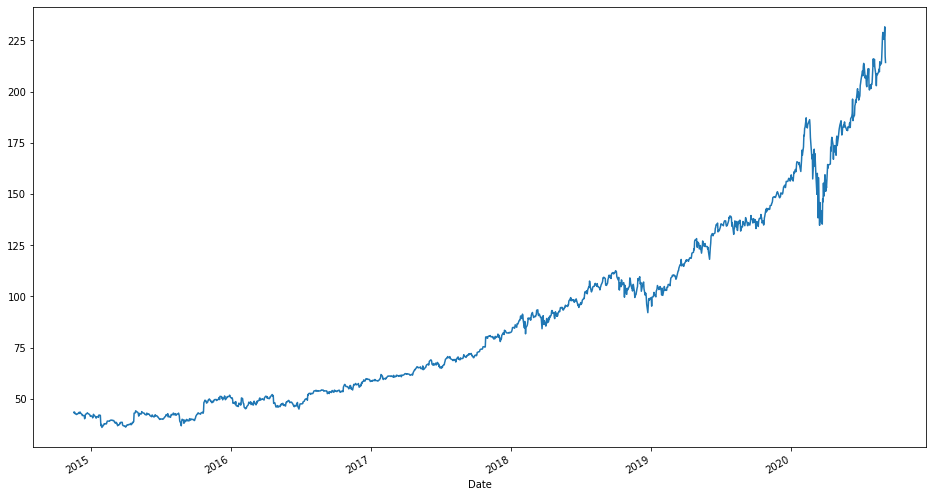

In [324]:
#hist['Close'].plot(figsize=(16, 9))

In [325]:
print(train_size)
training_complete = hist.iloc[:train_size, 0:1]
training_processed = training_complete.values
scaler = MinMaxScaler(feature_range = (0, 1))
training_scaled = scaler.fit_transform(training_processed)

1168


In [326]:
features = []
labels = []
for i in range(60, len(training_scaled)):
    features.append(training_scaled[i-60:i-1, 0])
    labels.append(training_scaled[i, 0])

In [327]:
features, labels = np.array(features), np.array(labels)

In [328]:
features = np.reshape(features, (features.shape[0], features.shape[1], 1))

In [329]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [330]:
model = Sequential()

In [331]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1], 1)))

In [332]:
model.add(Dropout(0.2))

In [333]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [334]:
model.add(Dense(units = 1))

In [335]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [336]:
model.fit(features, labels, epochs=20, batch_size=32)

Epoch 1/20
35/35 [==============================] - 4s 118ms/step - loss: 0.0241
Epoch 2/20
35/35 [==============================] - 4s 106ms/step - loss: 0.0041
Epoch 3/20
35/35 [==============================] - 4s 123ms/step - loss: 0.0035
Epoch 4/20
35/35 [==============================] - 5s 129ms/step - loss: 0.0035
Epoch 5/20
35/35 [==============================] - 4s 102ms/step - loss: 0.0026
Epoch 6/20
35/35 [==============================] - 4s 106ms/step - loss: 0.0026
Epoch 7/20
35/35 [==============================] - 3s 99ms/step - loss: 0.0023
Epoch 8/20
35/35 [==============================] - 4s 100ms/step - loss: 0.0025
Epoch 9/20
35/35 [==============================] - 3s 98ms/step - loss: 0.0022
Epoch 10/20
35/35 [==============================] - 3s 96ms/step - loss: 0.0027
Epoch 11/20
35/35 [==============================] - 3s 97ms/step - loss: 0.0023
Epoch 12/20
35/35 [==============================] - 3s 96ms/step - loss: 0.0028
Epoch 13/20
35/35 [===========

In [337]:
dates = hist.index

#testing_complete = pd.read_pickle("msft_last_365")
testing_complete = hist.iloc[train_size:, 0:1]
testing_processed = testing_complete.values

In [338]:
total = pd.concat((training_complete['Open'], testing_complete['Open']), axis=0)
print(total)

Date
2014-11-18     43.76
2014-11-19     43.34
2014-11-20     42.75
2014-11-21     43.66
2014-11-24     42.74
               ...  
2020-08-31    227.00
2020-09-01    225.51
2020-09-02    227.97
2020-09-03    229.27
2020-09-04    215.10
Name: Open, Length: 1460, dtype: float64


In [339]:
test_inputs = total[len(total) - len(testing_complete) - 60:].values

In [340]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

In [355]:
test_features = []
print(range(60, len(test_inputs)))
test_features.append(test_inputs[0:59, 0])
print("i is 0", test_features)

test_features.append(test_inputs[1:60, 0])
print("i is 1", test_features)

test_features.append(test_inputs[2:61, 0])
print("i is 2", test_features)

range(60, 352)
i is 0 [array([0.83246701, 0.82856857, 0.83786485, 0.84206317, 0.85655738,
       0.87315074, 0.91513395, 0.91153539, 0.91353459, 0.91263495,
       0.91973211, 0.89464214, 0.88864454, 0.87904838, 0.8797481 ,
       0.8697521 , 0.85845662, 0.86455418, 0.85665734, 0.85435826,
       0.86265494, 0.8872451 , 0.90253898, 0.88494602, 0.89394242,
       0.88594562, 0.88184726, 0.8887445 , 0.88944422, 0.8737505 ,
       0.87255098, 0.86235506, 0.85865654, 0.83336665, 0.86945222,
       0.88414634, 0.91123551, 0.94292283, 0.95741703, 0.93302679,
       0.93872451, 0.94152339, 0.94512195, 0.96051579, 0.96851259,
       0.99260296, 0.9840064 , 0.98820472, 0.99060376, 0.96211515,
       0.96001599, 0.96421431, 0.9845062 , 0.9795082 , 0.98620552,
       0.97770892, 0.98230708, 0.97830868, 0.9895042 ])]
i is 1 [array([0.83246701, 0.82856857, 0.83786485, 0.84206317, 0.85655738,
       0.87315074, 0.91513395, 0.91153539, 0.91353459, 0.91263495,
       0.91973211, 0.89464214, 0.88864454

In [341]:
test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_inputs[i-60:i-1, 0])

In [357]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
print(test_features)

[[[0.83246701]
  [0.82856857]
  [0.83786485]
  [0.84206317]
  [0.85655738]
  [0.87315074]
  [0.91513395]
  [0.91153539]
  [0.91353459]
  [0.91263495]
  [0.91973211]
  [0.89464214]
  [0.88864454]
  [0.87904838]
  [0.8797481 ]
  [0.8697521 ]
  [0.85845662]
  [0.86455418]
  [0.85665734]
  [0.85435826]
  [0.86265494]
  [0.8872451 ]
  [0.90253898]
  [0.88494602]
  [0.89394242]
  [0.88594562]
  [0.88184726]
  [0.8887445 ]
  [0.88944422]
  [0.8737505 ]
  [0.87255098]
  [0.86235506]
  [0.85865654]
  [0.83336665]
  [0.86945222]
  [0.88414634]
  [0.91123551]
  [0.94292283]
  [0.95741703]
  [0.93302679]
  [0.93872451]
  [0.94152339]
  [0.94512195]
  [0.96051579]
  [0.96851259]
  [0.99260296]
  [0.9840064 ]
  [0.98820472]
  [0.99060376]
  [0.96211515]
  [0.96001599]
  [0.96421431]
  [0.9845062 ]
  [0.9795082 ]
  [0.98620552]
  [0.97770892]
  [0.98230708]
  [0.97830868]
  [0.9895042 ]]

 [[0.82856857]
  [0.83786485]
  [0.84206317]
  [0.85655738]
  [0.87315074]
  [0.91513395]
  [0.91153539]
  [0.913

In [343]:
predictions = model.predict(test_features)

In [344]:
predictions = scaler.inverse_transform(predictions)

In [345]:
predictions = pd.DataFrame(predictions, index = dates[train_size:])

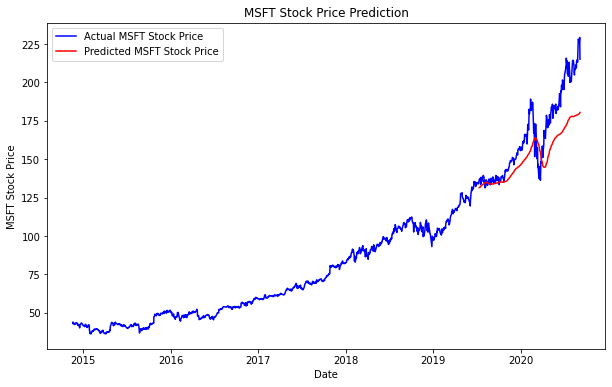

In [346]:
plt.figure(figsize=(10,6))
plt.plot(total, color='blue', label='Actual MSFT Stock Price')
plt.plot(predictions , color='red', label='Predicted MSFT Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()
